R_0 = 2.0


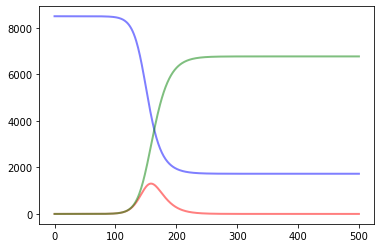

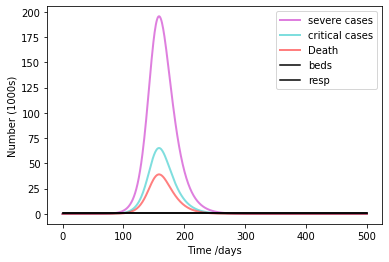

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 8.5*10**6
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 #multiplied by 36 
print("R_0 =", beta/gamma)

#mortality rate
m = 3/100

#Nb day simulation
D = 500
time = np.linspace(0, D, D)

#Hospital_capacity
beds = 844
resp = 777


S_array = np.ones(D)*S0
I_array = np.ones(D)*I0
R_array = np.ones(D)*R0
Severe   = np.zeros(D)
Critical = np.zeros(D)
Death    = np.zeros(D)
# A grid of time points (in days)
#t = np.linspace(0, 500, 500)
t=[0,1]

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
for i in range(1,D):
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    
    S, I, R = ret.T
    
    y0 = S[1], I[1], R[1]
    S_array[i]   = S[1]
    I_array[i]   = I[1]
    R_array[i]   = R[1]
    Severe[i]    = I[1] * 0.15 #require hosp
    Critical[i]  = I[1] * 0.05 #require resp
    Death[i]     = I[1]*m


# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w')
plt.plot(time, S_array/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(time, I_array/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(time, R_array/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')


fig = plt.figure(facecolor='w')
plt.plot(time, Severe/1000,  'm', alpha=0.5, lw=2, label='severe cases')
plt.plot(time, Critical/1000, 'c', alpha=0.5, lw=2, label='critical cases')
plt.plot(time, Death/1000, 'r', alpha=0.5, lw=2, label='Death')


plt.plot([0,D], [beds/1000, beds/1000], 'k', label='beds')
plt.plot([0,D], [resp/1000, resp/1000],'k', label='resp')


plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
legend = plt.legend()

plt.show()